<a href="https://colab.research.google.com/github/omugale21/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/DpAssign1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_path = '/content/auto-mpg.csv'
data = pd.read_csv(dataset_path)

In [3]:
print("Dataset Preview:")
print(data.head())

Dataset Preview:
    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [4]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64


In [5]:
data = data.dropna()

In [6]:
print("\nData Types:")
print(data.dtypes)


Data Types:
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [7]:
print("\nStatistical Summary:")
print(data.describe())


Statistical Summary:
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


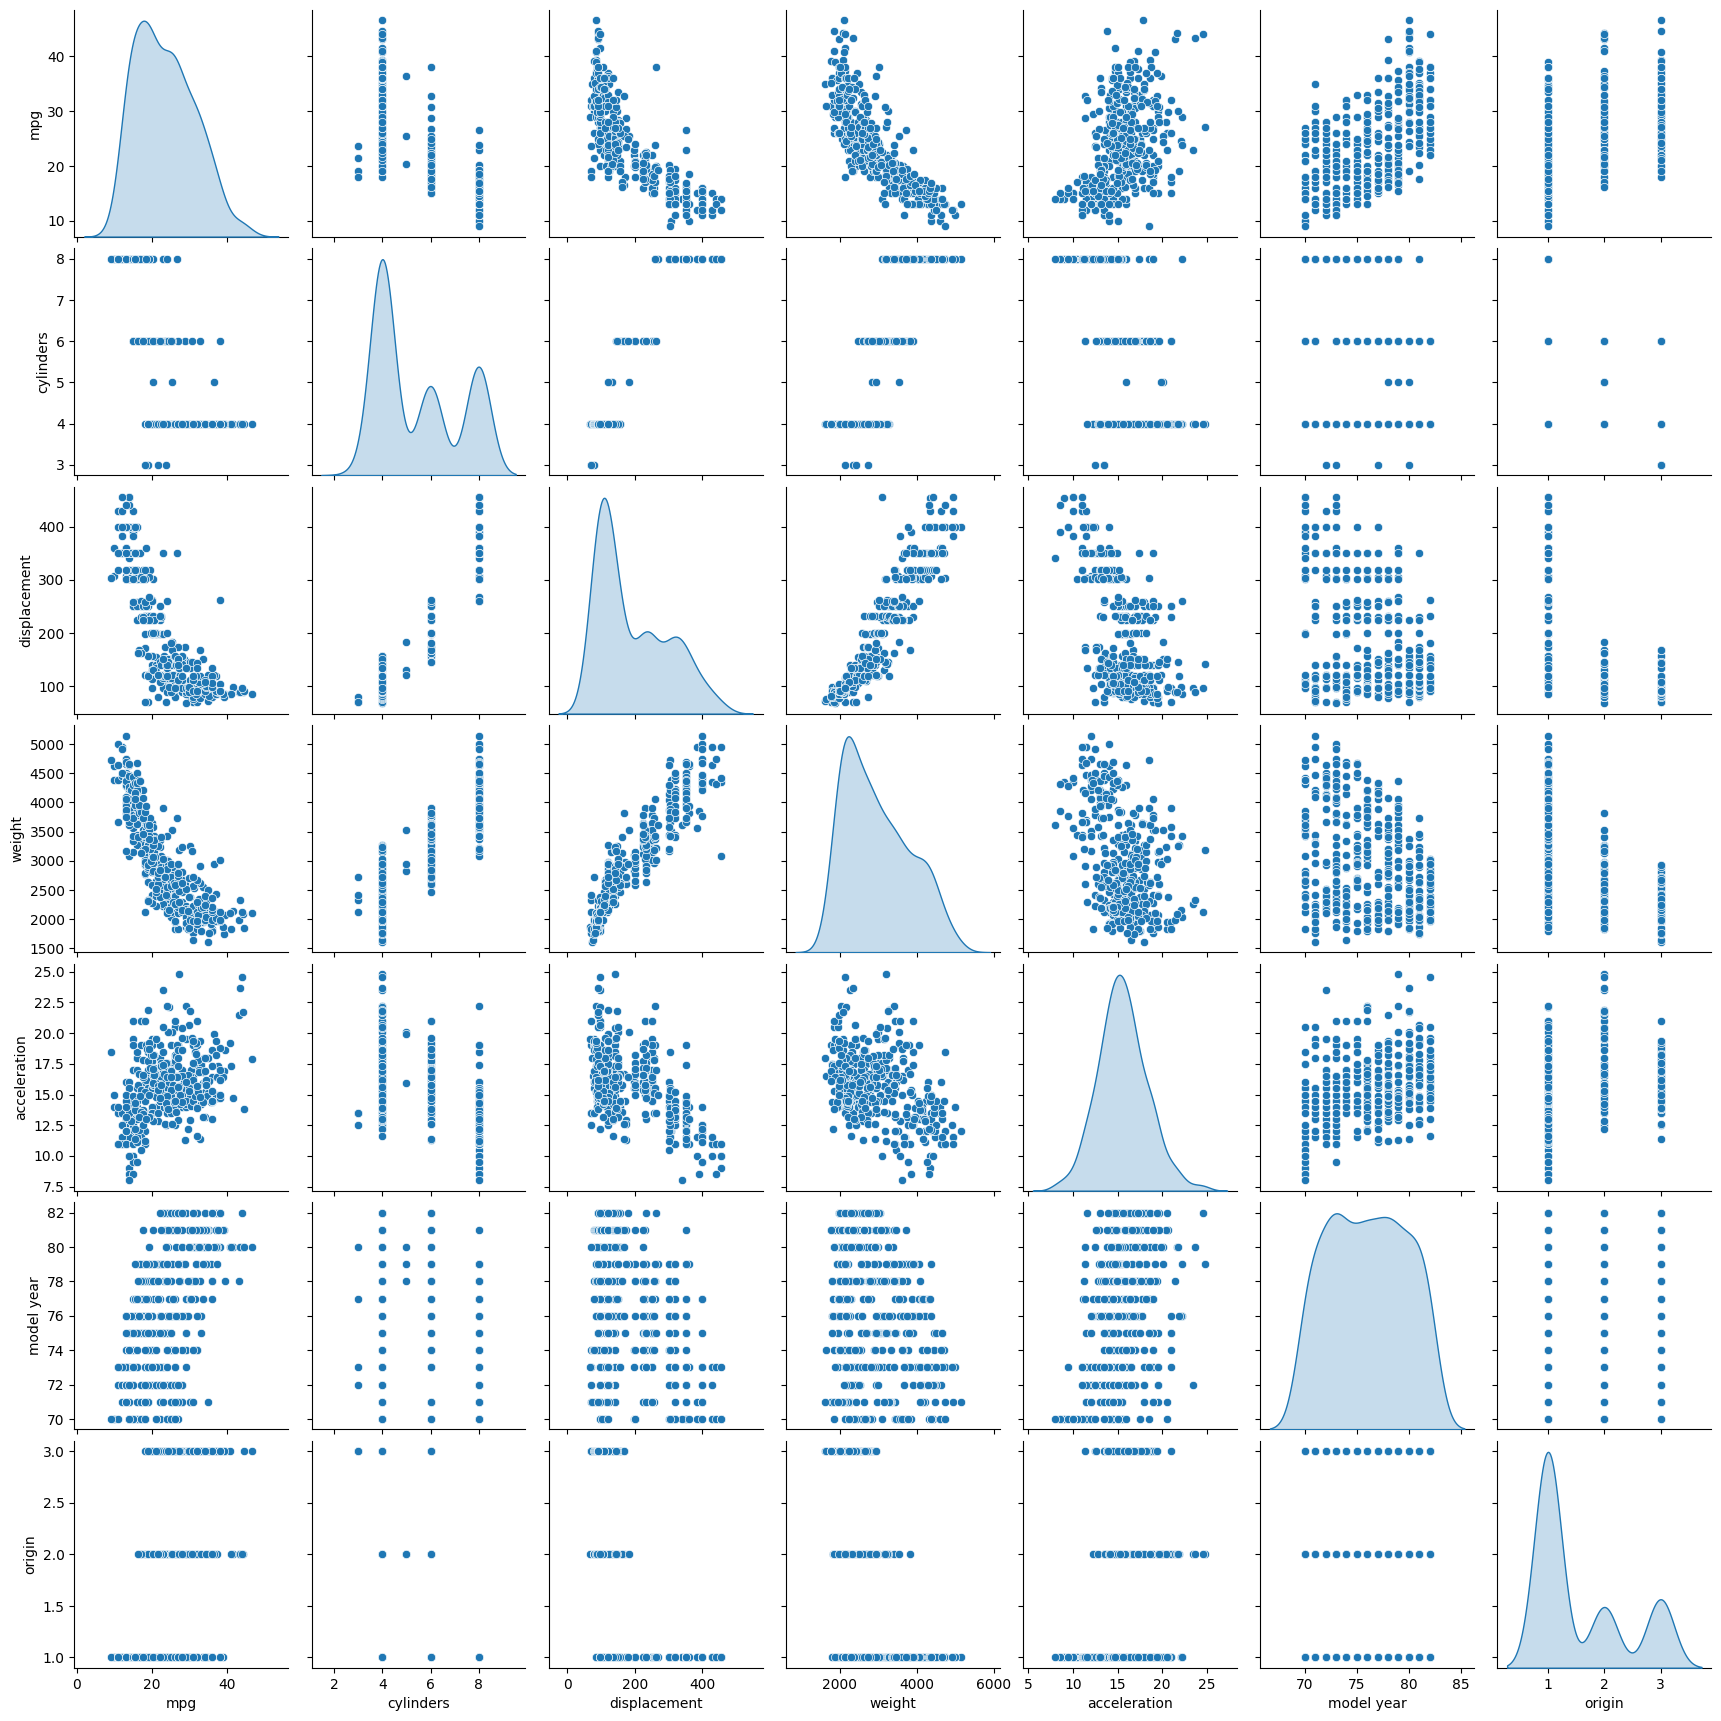

In [8]:
sns.pairplot(data, diag_kind='kde')
plt.show()

In [10]:
data.replace('?', np.nan, inplace=True)


In [11]:
for col in data.columns:
    if data[col].dtype == 'object':  # Check if the column is of object type
        try:
            data[col] = pd.to_numeric(data[col])
        except ValueError:
            pass

In [12]:
data = data.dropna()

In [13]:
print("Updated Data Types:")
print(data.dtypes)

Updated Data Types:
mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [15]:
numeric_data = data.select_dtypes(include=[np.number])

In [16]:
print("Numeric Columns:")
print(numeric_data.columns)

Numeric Columns:
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')


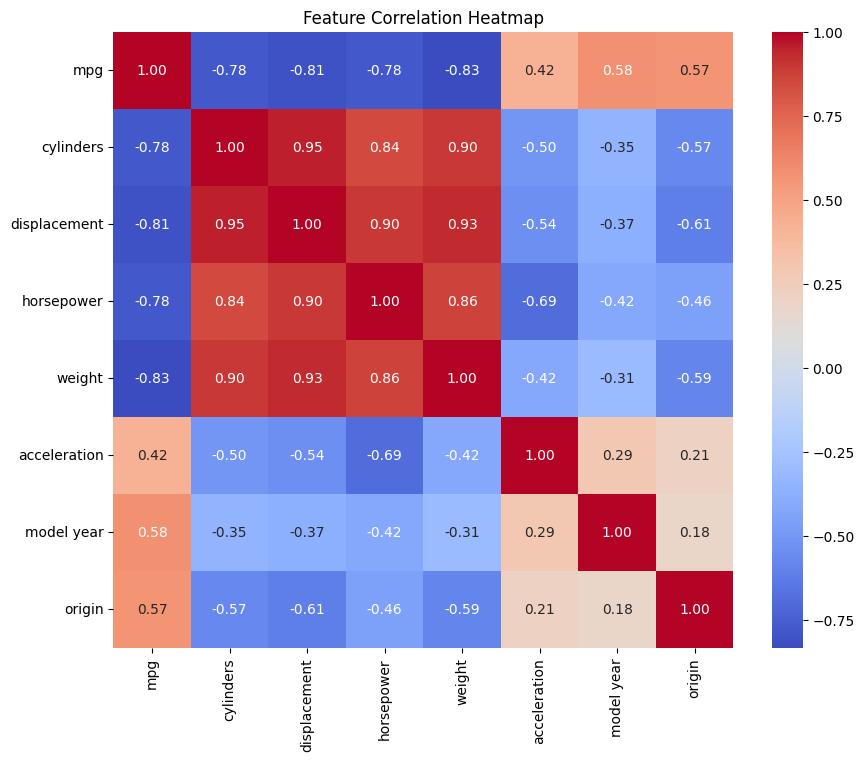

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [19]:
target = 'mpg'
features = [col for col in data.columns if col != target]

X = data[features]
y = data[target]

In [20]:
X = pd.get_dummies(X, drop_first=True)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [25]:
print("Linear Regression Performance:")
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, R2: {r2_lr:.2f}")

Linear Regression Performance:
MSE: 16.34, RMSE: 4.04, R2: 0.68


In [26]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [27]:
y_pred_rf = rf_model.predict(X_test)

In [28]:
print("\nRandom Forest Performance:")
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest Performance:
MSE: 5.63, RMSE: 2.37, R2: 0.89


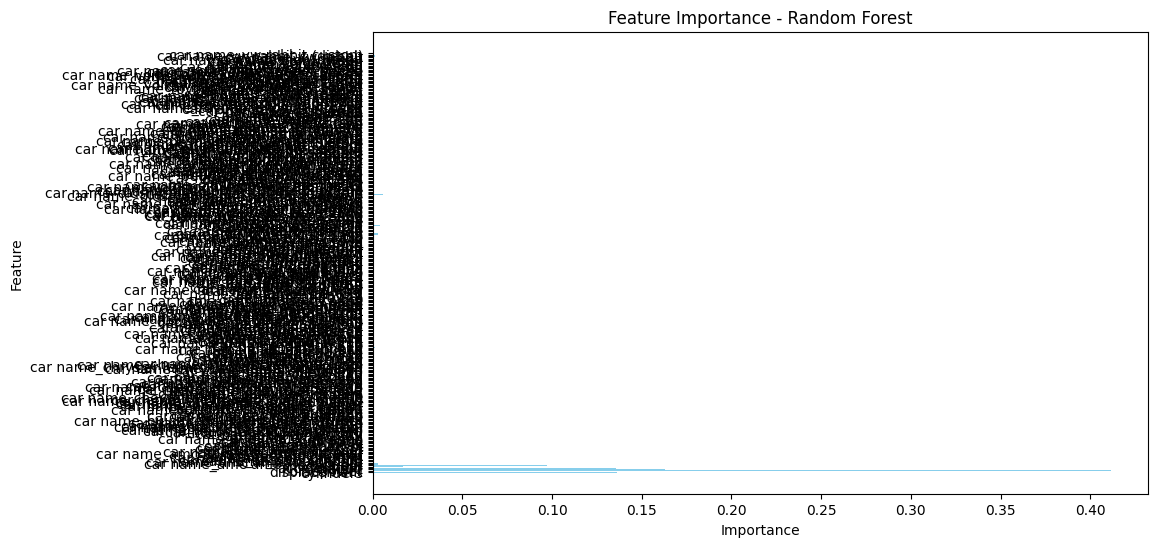

In [29]:
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
